#### Import of Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [5]:
df = pd.read_csv('datasets/bupa.csv')


In [6]:
df.head(5)

,Mcv,Alkphos,Sgpt,Sgot,Gammagt,Drinks,Selector
0,85.0,92.0,45.0,27.0,31.0,0.0,1
1,85.0,64.0,59.0,32.0,23.0,0.0,2
2,86.0,54.0,33.0,16.0,54.0,0.0,2
3,91.0,78.0,34.0,24.0,36.0,0.0,2
4,98.0,55.0,13.0,17.0,17.0,0.0,2


In [7]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mcv       345 non-null    float64
 1   Alkphos   345 non-null    float64
 2   Sgpt      345 non-null    float64
 3   Sgot      345 non-null    float64
 4   Gammagt   345 non-null    float64
 5   Drinks    345 non-null    float64
 6   Selector  345 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 19.0 KB
Number of duplicated rows is:  4
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

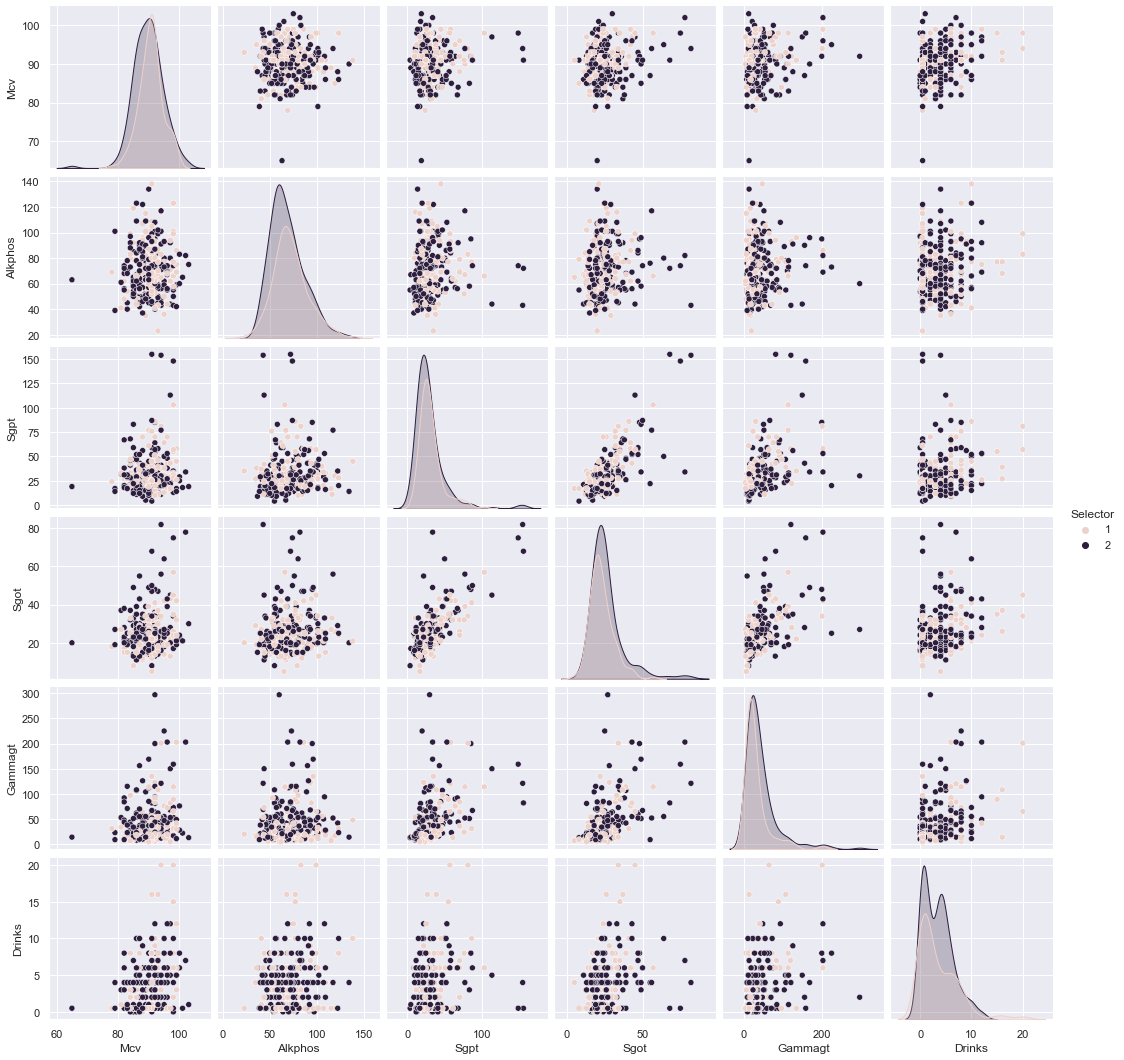

In [8]:
sns.pairplot(df, hue='Selector')
plt.show()

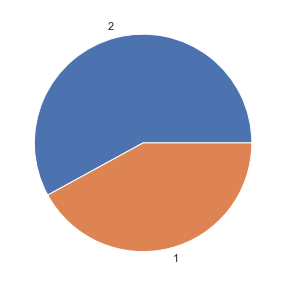

In [9]:
y =df['Selector']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [10]:
X = df.drop(columns=['Selector'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mcv,345.0,90.159420,4.448096,65.0,87.0,90.0,93.0,103.0
Alkphos,345.0,69.869565,18.347670,23.0,57.0,67.0,80.0,138.0
Sgpt,345.0,30.405797,19.512309,4.0,19.0,26.0,34.0,155.0
Sgot,345.0,24.643478,10.064494,5.0,19.0,23.0,27.0,82.0
Gammagt,345.0,38.284058,39.254616,5.0,15.0,25.0,46.0,297.0
Drinks,345.0,3.455072,3.337835,0.0,0.5,3.0,6.0,20.0


#### Standardize the Data

In [11]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mcv,345.0,-1.189387e-15,1.001452,-5.664438,-0.711318,-0.035892,0.639533,2.890952
Alkphos,345.0,3.655691e-16,1.001452,-2.558234,-0.702447,-0.156627,0.552939,3.718695
Sgpt,345.0,7.980734e-17,1.001452,-1.355255,-0.585393,-0.226124,0.184469,6.394690
Sgot,345.0,9.267949e-17,1.001452,-1.954595,-0.561546,-0.163532,0.234482,5.707175
Gammagt,345.0,6.693519e-17,1.001452,-0.849133,-0.594016,-0.338899,0.196847,6.600286
Drinks,345.0,-4.119088e-17,1.001452,-1.036627,-0.886612,-0.136536,0.763556,4.963983


#### Observations and Variables

In [12]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

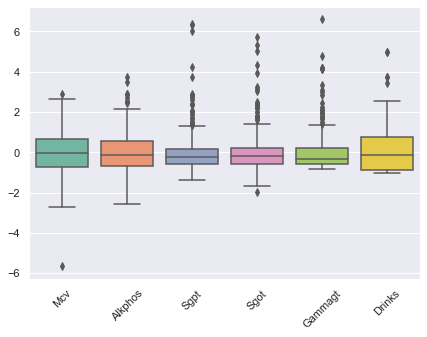

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

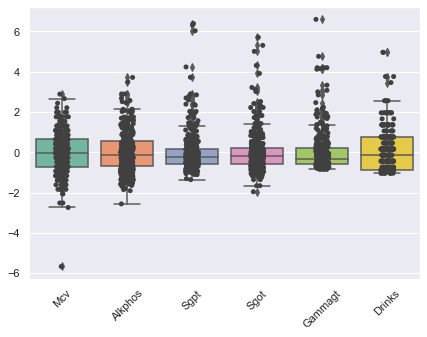

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

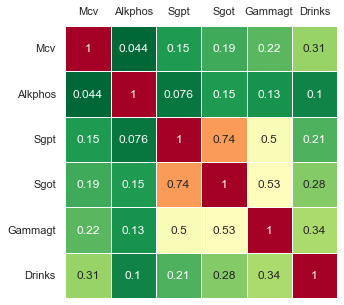

In [15]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [16]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [17]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,-0.068369,1.613239,1.306709,-0.263780,-0.193169
1,0.231005,2.135386,-0.288602,-0.274751,-0.674976
2,-0.936316,1.078314,-0.650157,0.132927,0.896831
3,-0.210177,0.452037,0.407172,-0.932136,0.217646
4,-1.141367,-1.174042,-0.918323,-1.677415,0.397334
...,...,...,...,...,...
340,-0.348069,-0.344324,-0.835638,0.145051,0.073081
341,-0.597338,0.094704,-1.110356,0.338613,-0.484028
342,-0.761682,0.549966,-0.694634,1.060660,0.050289
343,0.735454,-1.349591,1.071524,-0.252107,-0.001067


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (41.7% expl.var)', ylabel='PC2 (17.8% expl.var)'>)

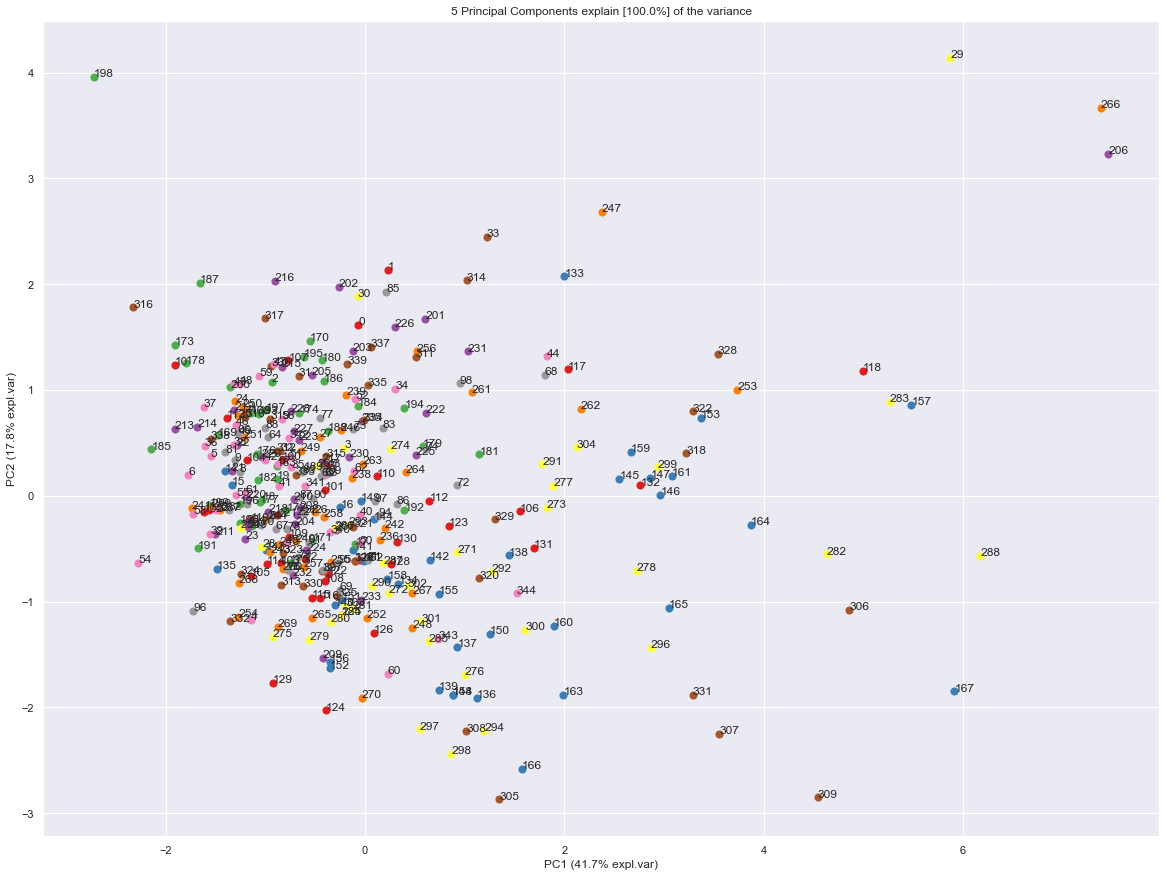

In [18]:
model.scatter(label=True, legend=False)

Eigenvectors

In [19]:
A = out['loadings'].T

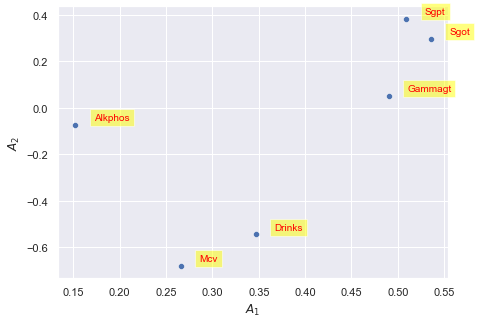

In [20]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

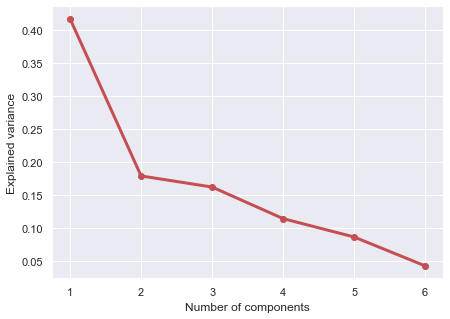

In [21]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

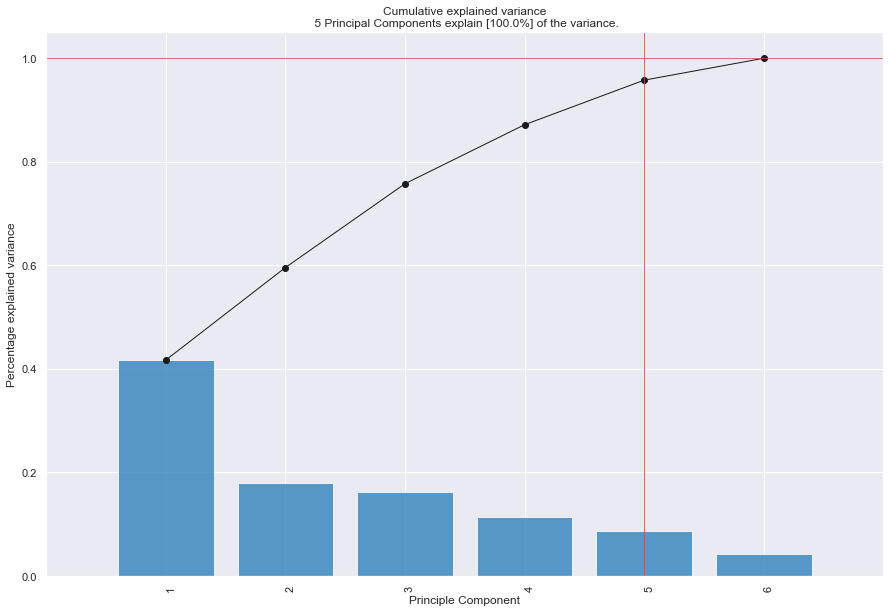

<Figure size 504x360 with 0 Axes>

In [22]:
model.plot();